In [5]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../005_src/') #use relative path
#os.chdir("../005_src")

from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [6]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [17]:
#this_date = "20210714"
#ts = "20h41m41s"
#GCN_num = "009"
#this_GCN = f"GCN_{GCN_num}"
#print (this_GCN)

GCN_009


In [ ]:
#20210722-17h23m13s

In [5]:
this_date = "20210722"
ts = "17h23m13s"
GCN_num = "010"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

GCN_010


In [6]:
if GCN_num == "006": 
    from _03_Networks.GCN_006.GCN_model_006 import *
    check_import()
    from _03_Networks.GCN_006.GCN_trainer_006 import *

elif GCN_num == "007": 
    from _03_Networks.GCN_007.GCN_model_007 import *
    check_import()
    from _03_Networks.GCN_007.GCN_trainer_007 import *
    
elif GCN_num == "008": 
    from _03_Networks.GCN_008.GCN_model_008 import *
    check_import()
    from _03_Networks.GCN_008.GCN_trainer_008 import *
elif GCN_num == "009": 
    from _03_Networks.GCN_009.GCN_model_009 import *
    check_import()
    from _03_Networks.GCN_009.GCN_trainer_009 import *
    
elif GCN_num == "010": 
    from _03_Networks.GCN_010.GCN_model_010 import *
    check_import()
    from _03_Networks.GCN_010.GCN_trainer_010 import *

imported model: GCN_010 at 17h47m18s
edges_attr=False


## RELOAD

In [7]:

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

dateset_test_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/dataset_test"
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

dateset_test = pkl.load(open(f'{dateset_test_path}.pt',"rb"))

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010/20210722-17h23m13s/


{'input_file_name': '20210722-10h51m45s_timesteps200_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '200',
 'run_time': '17h23m13s',
 'model': 'GCN_010',
 'random_seed': 457362,
 'train_size': 0.9,
 'batch_size': 256,
 'Nepochs': 50,
 'save_every': 25,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'num_rows_training': 20,
 'num_rows_validation': 1,
 'num_rows_test': 2,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 7,
 'size_output': 2,
 'model_architecture': GCN(
   (conv1): GCNConv(7, 256)
   (conv2): GCNConv(256, 254)
   (conv3): GCNConv(254, 2)
 ),
 'criterion': L1Loss(),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ),
 'model_path': '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010/20210722-17h23m13s/20210722-17h23m13sEPOCH_50of50_FINAL__GC

In [8]:
reloaded_dict["model_architecture"]

GCN(
  (conv1): GCNConv(7, 256)
  (conv2): GCNConv(256, 254)
  (conv3): GCNConv(254, 2)
)

In [9]:
# load losses
t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010/20210722-17h23m13s/20210722-17h23m13s_train_val_loss_plot.png


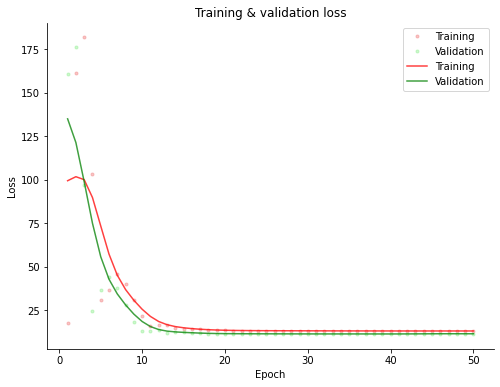

In [10]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = None,
                  gaussian=True,
                  sigma=2,
                  figsize=(8, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [25]:
# load model
# defining the model
load_model = GCN(num_input_features=reloaded_dict['size_input'],
            num_output_features =reloaded_dict['size_output'],
            random_seed = 42,
            hc_1 = 16,
           )


In [26]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN(
  (conv1): GCNConv(6, 16)
  (conv2): GCNConv(16, 2)
)

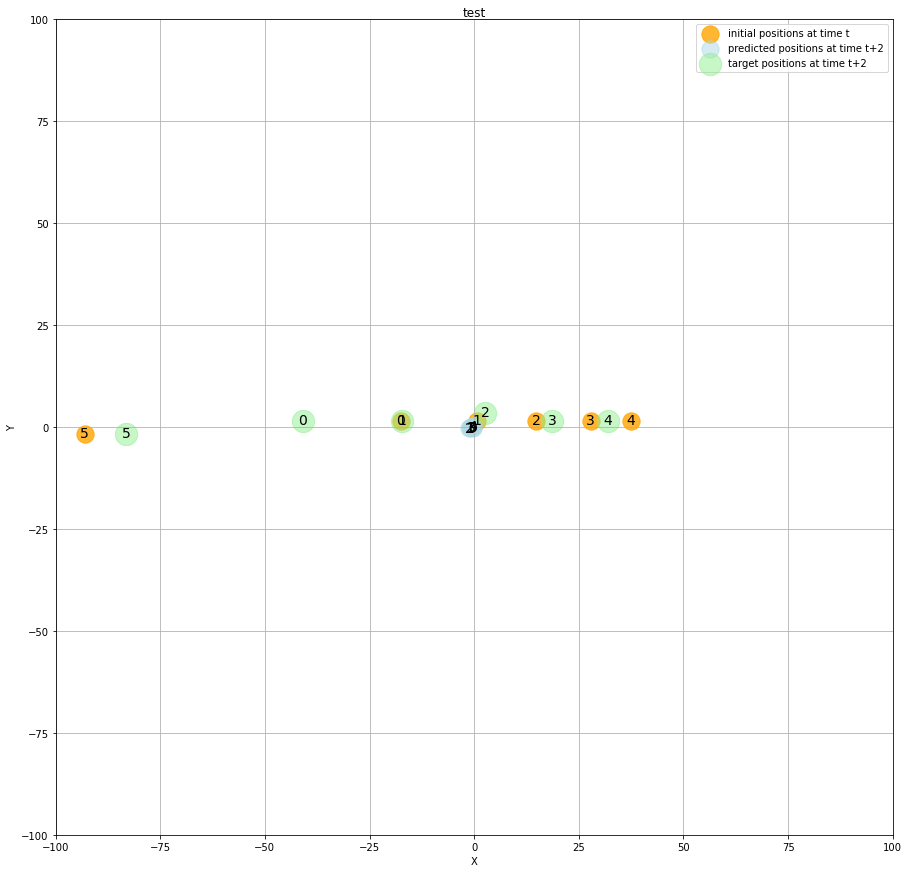

In [27]:
plot_results_model(
                   load_model, 
                   dateset_test[0],
                   start_from = 0,
                   end_at = 10,
                   edges_attr = True,
                   figsize = (15,15),
                   plot_input = True,
                   plot_target = True,
                   plot_prediction = True,
                   plot_intention = False, 
                   title = "test",
    
                   xlim = (-100,100),
                   ylim = (-100,100),
                  )

In [12]:
GCN_num='010'
#20210723-14h56m27s
this_date= 20210723
ts= '10h15m08s'
#20210723-14h56m27s

In [13]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.25,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 10.25it/s]

found 5 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010/20210723-10h15m08s/figures/
the gif will be create using the first 5 images


5it [00:00, 10.67it/s]


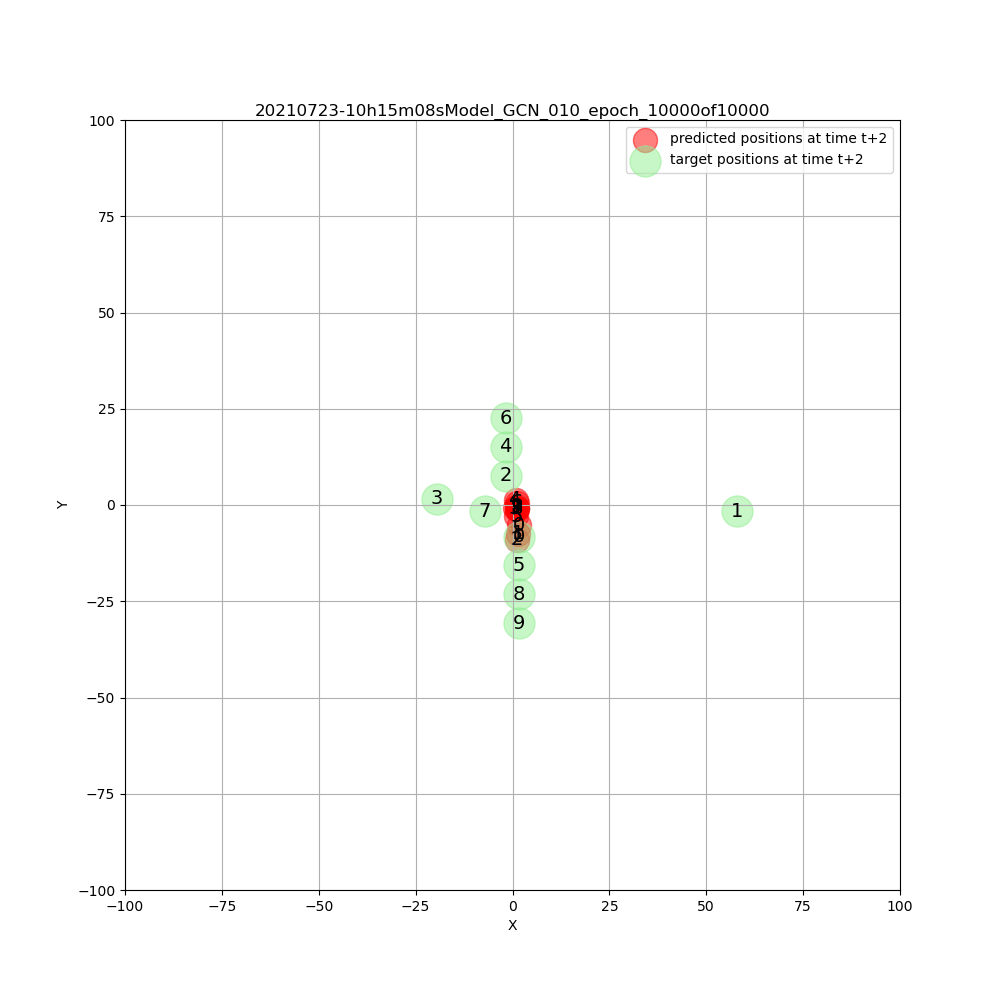

In [14]:
Image(open(f'{path_GIF}','rb').read())

In [ ]:
deleted_folders = delete_empty_r(directory= OUTPUT_DIR,printstat = True)